<a href="https://colab.research.google.com/github/Minion-tech/data-science-project/blob/main/Paisabazzar_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Paisabazzar project



##### **Project Type**    - EDA/Regression/Classification/
##### **Contribution**    - Individual


# **Project Summary -**

This project aimed to predict customer credit scores ("Poor," "Standard," or "Good") using a dataset of their financial and personal information. The process began with a thorough Exploratory Data Analysis (EDA), where visualizations revealed strong relationships between credit scores and variables like outstanding debt, credit history, and income. These initial findings were then statistically validated through hypothesis testing.

Following EDA, the data was rigorously pre-processed. This involved handling missing values, encoding all categorical text data into a numerical format, and scaling the features to prepare them for modeling. Three distinct machine learning models were trained and evaluated: a baseline Logistic Regression, a more complex Random Forest, and a powerful XGBoost classifier. By comparing key performance metrics, a final, optimal model was selected.





# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


A financial institution needs to automate and improve its credit risk assessment process. The current method of evaluating a customer's creditworthiness is time-consuming and may not effectively identify high-risk individuals, leading to potential financial losses from loan defaults.

The goal of this project is to develop a machine learning classification model that accurately predicts a customer's credit score—categorized as "Poor," "Standard," or "Good"—based on a range of their financial behaviors and personal data.

The success of the model will be measured by its ability to reliably identify customers with a "Poor" credit score, thereby enabling the institution to make smarter, data-driven lending decisions and minimize its exposure to credit risk.









# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading


In [ ]:
#reading the data and storing in dataframe as df
df = pd.read_csv('/content/dataset-2 (1).csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head() # display the first 5 rows of the dataframe
df.tail() #display the last 5 rows of the dataframe
df.sample(5) #display the random 5 rows

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
97553,151963,32319,2,Blounte,48.0,615298753.0,Engineer,80676.84,6929.070000,4.0,...,Good,1035.77,32.431749,213.0,No,0.000000,73.283419,Low_spent_Small_value_payments,666.232559,Standard
34801,57835,47400,2,Camberor,50.0,194049685.0,Scientist,28880.56,2502.713333,3.0,...,Standard,412.80,38.946298,303.0,Yes,20.969729,35.551411,Low_spent_Small_value_payments,391.197707,Standard
44529,72427,50635,2,Luciana Lopezc,26.0,179939579.0,Journalist,31113.36,2780.780000,3.0,...,Standard,1151.70,22.759494,158.0,NM,73.152983,22.015309,Low_spent_Small_value_payments,273.562447,Standard
30822,51864,45368,7,Emily Flitterm,18.0,787354659.0,Architect,19966.31,1509.859167,6.0,...,Bad,2785.45,23.171838,64.0,Yes,135.394678,38.261597,High_spent_Medium_value_payments,227.329642,Standard
69015,109153,27784,8,Poornima Guptaf,39.0,821501894.0,Accountant,103495.68,8611.640000,7.0,...,Standard,482.64,24.009116,90.0,Yes,427.144183,81.877845,Low_spent_Medium_value_payments,63.024889,Standard


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape #diplay the number of rows and number of columns

(100000, 28)

### Dataset Information

In [ ]:
# Dataset Info
df.info() #display the information about he dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum() #check for the total number of duplicate rows

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum() #get the count of missing values in each column (df.isnull is matrix filled with true and false)

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


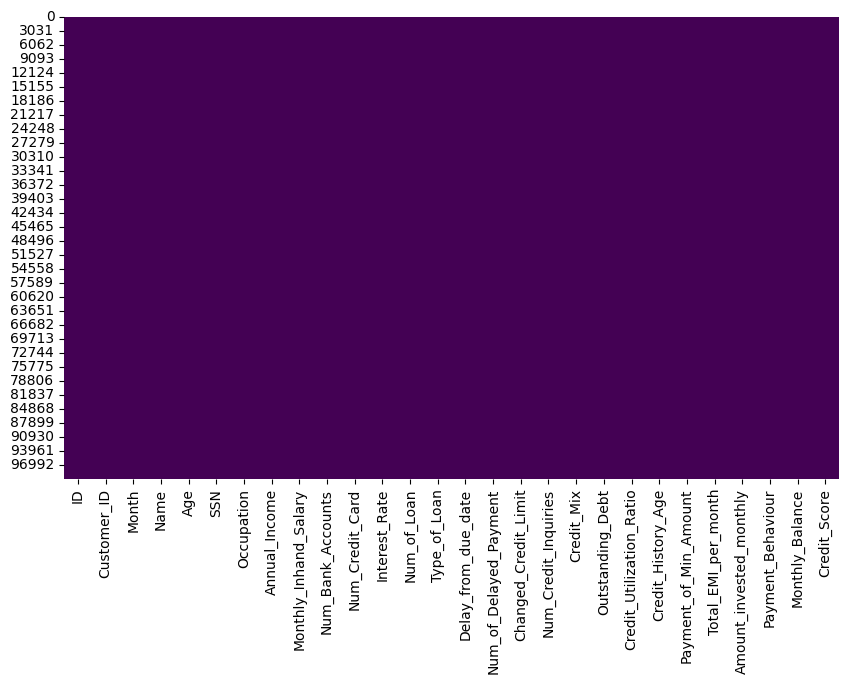

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') #darak puprle = data is present , yellow = data is absent
plt.show()
#no missing values

### What did you know about your dataset?

Answer Here:
*   the dataset has 100000 rows and 28 columns.
* It doesn't have any null value


*   the datatypes are float64(18), int64(3), object(7)

*   there is no duplicate value




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns #display the columns name

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe() #display the stastical summary of dataframe

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Variables Description

Answer Here: count = 1000000
std = standard diviation
max and min is printing the maximum and minimum value of each column
25%, 50%, 75% = one quarter, median and third quater of the line respectively
the below cell defines the unique value of the each column

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
  print(f"column: {column}")
  unique_count = df[column].nunique()
  print(f"Number of unique Values: {unique_count} ")

  #printing only 10 or fewer
  if unique_count <= 10:
    print(f"Unique Values: {df[column].unique()}")
    print("\n")

column: ID
Number of unique Values: 100000 
column: Customer_ID
Number of unique Values: 12500 
column: Month
Number of unique Values: 8 
Unique Values: [1 2 3 4 5 6 7 8]


column: Name
Number of unique Values: 10128 
column: Age
Number of unique Values: 43 
column: SSN
Number of unique Values: 12500 
column: Occupation
Number of unique Values: 15 
column: Annual_Income
Number of unique Values: 12488 
column: Monthly_Inhand_Salary
Number of unique Values: 13241 
column: Num_Bank_Accounts
Number of unique Values: 12 
column: Num_Credit_Card
Number of unique Values: 12 
column: Interest_Rate
Number of unique Values: 34 
column: Num_of_Loan
Number of unique Values: 10 
Unique Values: [4. 1. 3. 0. 2. 7. 5. 6. 8. 9.]


column: Type_of_Loan
Number of unique Values: 6261 
column: Delay_from_due_date
Number of unique Values: 63 
column: Num_of_Delayed_Payment
Number of unique Values: 26 
column: Changed_Credit_Limit
Number of unique Values: 3452 
column: Num_Credit_Inquiries
Number of unique V

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#handling duplicate rows, updating the Dataframe in place
df.drop_duplicates(inplace=True)
#Filling missing values in "monthly balance" column with median monthly balance
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True)



/tmp/ipython-input-3031801919.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True)


### What all manipulations have you done and insights you found?

Answer Here.: As whole dataset doesnot contain any null value or duplicate value so no manipulation is needed but if there was a duplicate value we will totally drop the whole row and

*   null/missing values for numerical columns we will take median so it will not affect ouliers
*   null/missing values for categorical columns we will take mode(the most occuring value)



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate Analysis**

#### Chart - 1

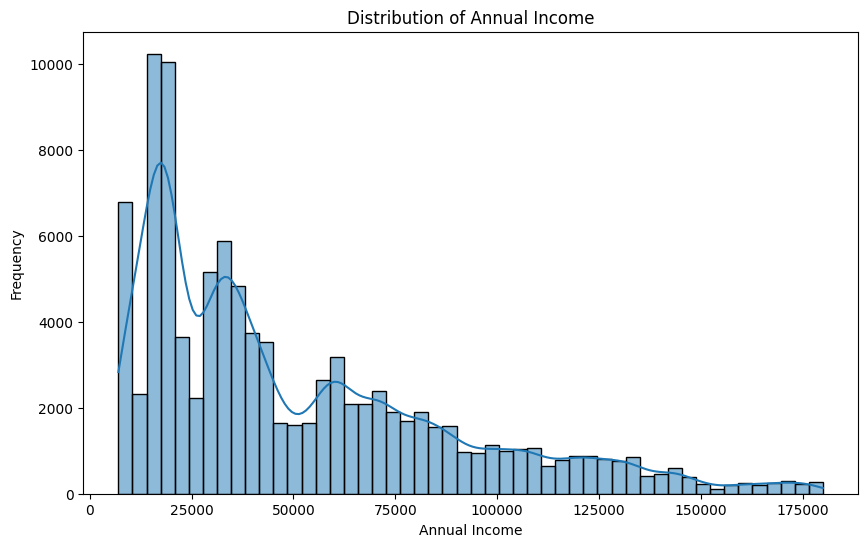

In [ ]:
# Chart - 1 visualization code
#Numerical variable(univariate)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Annual_Income', bins=50, kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()

##### 1. Why did you pick the specific chart?

the Histogram is the best choice for understanding the distribution of a single numerical variable. it clearly shows where the majority of data points are concentrated and reveals the shape of the data.

##### 2. What is/are the insight(s) found from the chart?

the most striking insights is that the data is heavily right-skewed. this means

*   the large people has lower income in the dataset (the large peak at left)
*   there are very few people with extremely high income ( the long tail at right)



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes it will the machine learning model can be sensitive to such extreme outliers and skewed distrbution. a model might pay too much attension to high-income earners leading to the poor prediction for the majority of average income customers.

#### Chart - 2

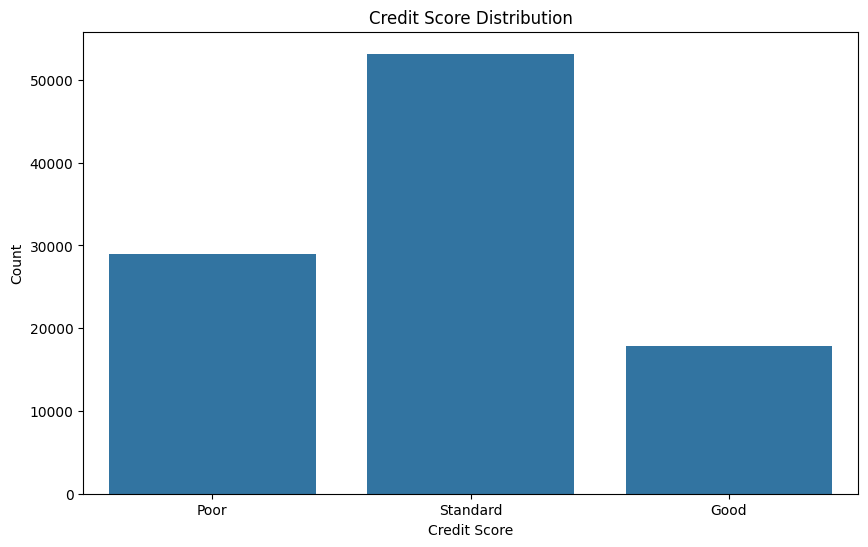

In [ ]:
# Chart - 2 visualization code
# for categorical data(univariate)
plt.figure(figsize=(10,6))
order = ['Poor', 'Standard', 'Good']
sns.countplot(data=df, x='Credit_Score', order=order)
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Score Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is perfect for a categorical variable like credit_score. it quickly shows the frequency of each category , allowing us to see the overall class balance

##### 2. What is/are the insight(s) found from the chart?

the key insights is that the dataset is imbalanced


*   the standard and googd credit score categories have a significantly higher number of people compared to the poor category




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

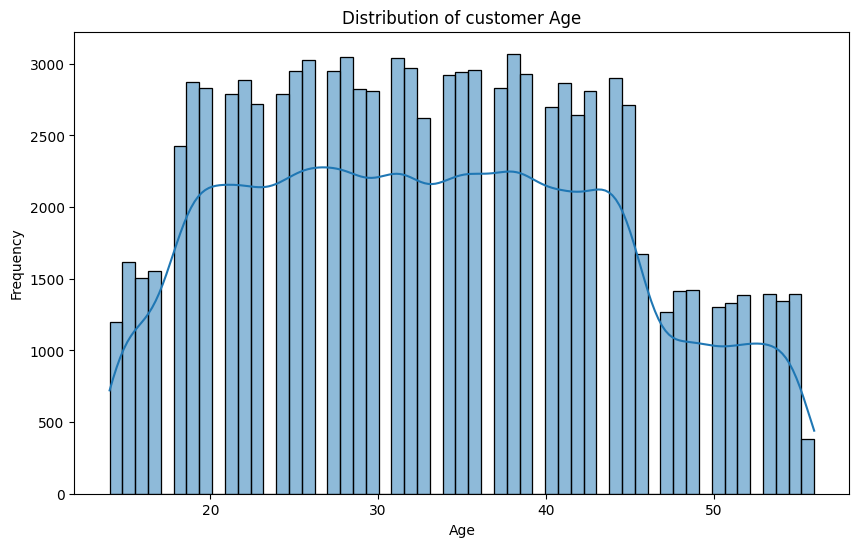

In [ ]:
# Chart - 3 visualization code
#numerical data(univariate)
#histogram of age
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

a histogram is best way to se the frequenncy distribution of a numerical variable like age

##### 2. What is/are the insight(s) found from the chart?

The distribution of age is quite broad and relatively uniform. this indicates that the customer nase is diverse, spanning from young adults (around 20) to older individuals (up to thiers 60). unlike the income data, there is no strong skew; the customers are spread out across all age

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is positive insights. the diverse age distribution suggests that the financial  product or service are appealinng to a wide audience. so for our model we did not worry about the age bias

#### Chart - 4

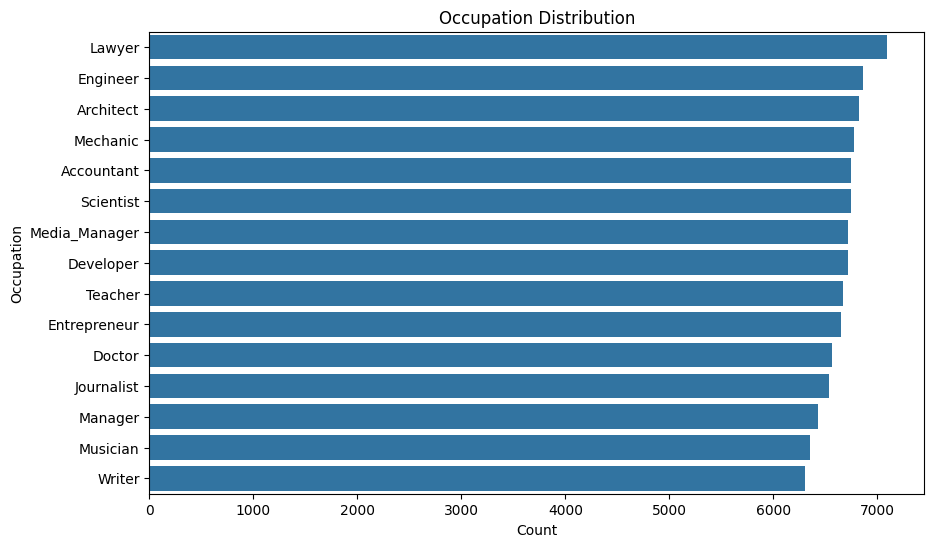

In [ ]:
# Chart - 4 visualization code
#catogorical data(univariate)
plt.figure(figsize=(10,6))
sns.countplot(data=df, y = 'Occupation', order = df['Occupation'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Occupation Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

a horizontal chart is best plot here with many different occupation categories, a vertical bar would be overlapping and unreadable labels

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a diverse range of professions, but some are clearly more commons than other . the top occupation reveals include:
developer , architect, engineer, lawyers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

undersatnding the common ocupation of your customers is srucial for marketing and product development. if a large segments of customers are lawyers a buiseness can make targeting marketing compaigns or financial products that appeal to that demographic

# **Bivariate Analysis**

#### Chart - 5

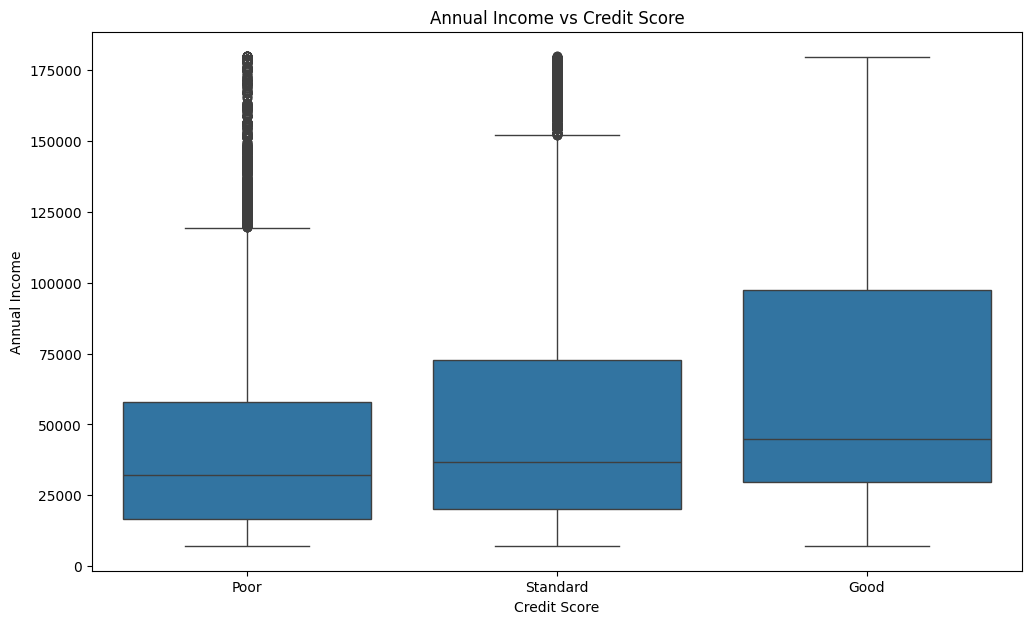

In [ ]:
# Chart - 5 visualization code
#Bivariate Analysis
#Numerical vs Categorical
plt.figure(figsize=(12,7))
sns.boxplot(x='Credit_Score', y="Annual_Income", data=df, order=['Poor', 'Standard', 'Good'])
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.title('Annual Income vs Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is the ideal way to compare the distribution of a numerical variable like Annual income and categorical varible credit score. it let  us see the difference in medium.

##### 2. What is/are the insight(s) found from the chart?

this is the clear and strong positive relationship between annual income and credit score

*   the medium score income . that is the line inside the box for custommers with a good score is significantly higher thanthose with a standard score, which in turn higher than the poor score
*   the entire range of the central 50% of income shift upwards as the credit score improves






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is a very valuable insight. It confirms that Annual_Income is a strong predictor of creditworthiness. For our machine learning model, this feature will almost certainly be very important. For the business, it reinforces the idea that higher-income clients are generally lower-risk. This can help in tailoring product offerings and marketing strategies to different income segments.



#### Chart - 6

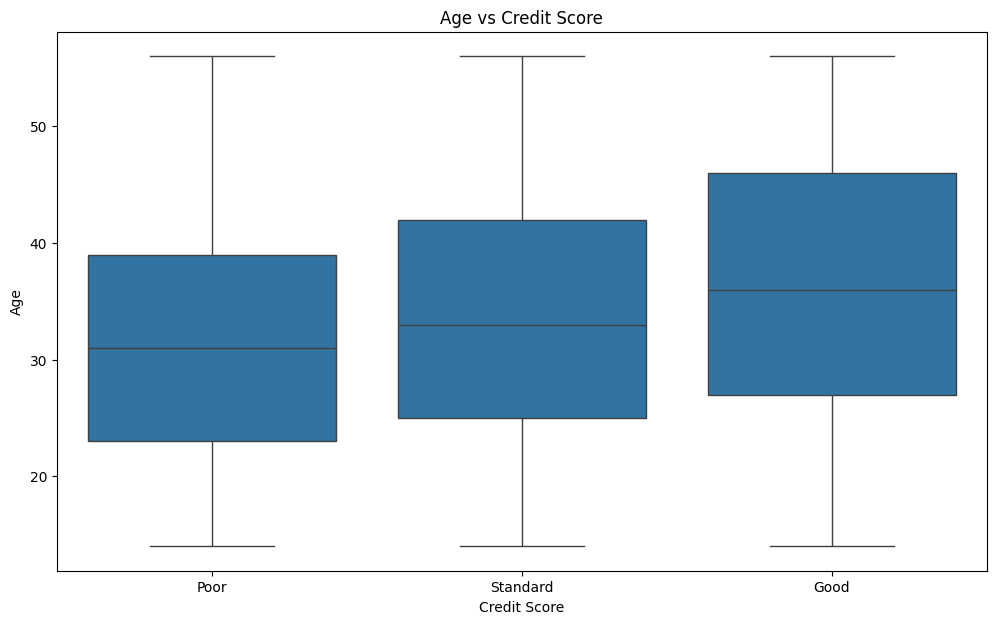

In [ ]:
# Chart - 6 visualization code
#bivariate Analysis
#Numerical vs Categorical
plt.figure(figsize=(12,7))
sns.boxplot(x='Credit_Score', y="Age", data=df, order=['Poor', 'Standard', 'Good'])
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.title('Age vs Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

a box plot is used to compare the distribution of a numerical variable (Age) across the different categories of Credit_Score. This helps us see if certain age groups tend to have better or worse credit.

##### 2. What is/are the insight(s) found from the chart?

This chart provides a very different story from the previous one. The distributions of age are remarkably similar across all three credit score categories.

The median age (the line inside the box) is almost identical for "Poor," "Standard," and "Good" scores.

The spread of ages (the height of the boxes) is also nearly the same for each category.

There is no discernible trend. A person's age does not seem to have a strong, direct relationship with their credit score in this dataset.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the suggests that age is not a good predictor of credit score. Unlike income, which showed a clear trend, age does not seem to be a deciding factor. So our model should not be trained on age factor as it did affect that much  it's a caution against making assumptions based on age; a younger customer is not inherently more of a credit risk than an older customer.

#### Chart - 7

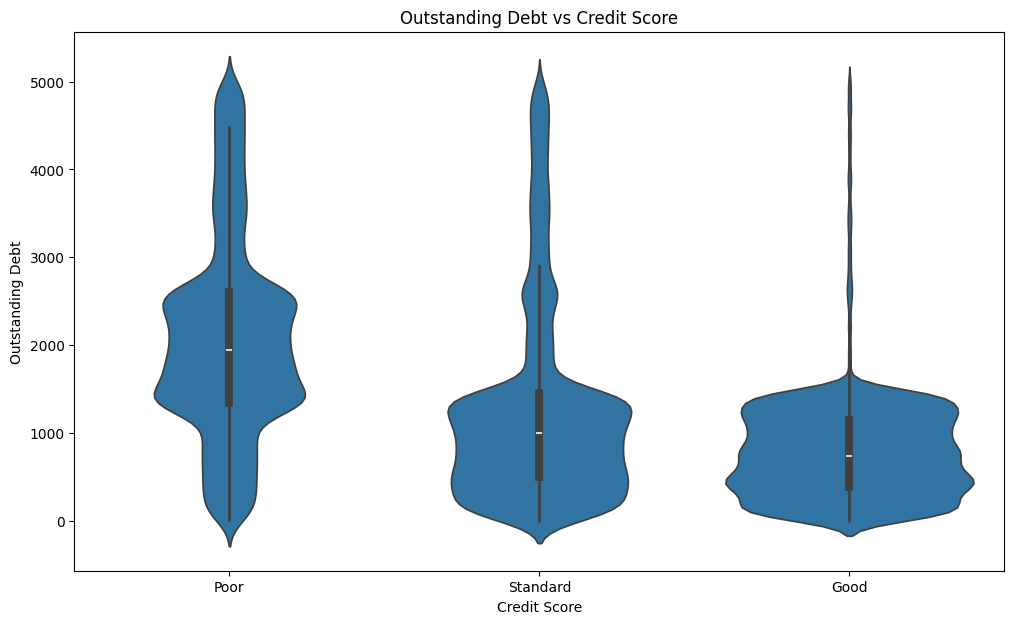

In [ ]:
# Chart - 7 visualization code
#bivariate analysis
#Numerical vs Categorical
plt.figure(figsize=(12,7))
sns.violinplot(x='Credit_Score', y="Outstanding_Debt", data=df, order=['Poor', 'Standard', 'Good'])
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.title('Outstanding Debt vs Credit Score')
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot is a great choice here. It's like a box plot, but it also shows the probability density of the data at different values (the wider the violin, the more data points are there). This helps us see not just the range of Outstanding_Debt for each credit score, but also where the values are most concentrated.

##### 2. What is/are the insight(s) found from the chart?

Customers with a "Poor" credit score have the highest median outstanding debt. The violin shape is wide at the top, showing a large concentration of people with high debt.

The median debt for the "Standard" score category is lower.

Customers with a "Good" credit score have the lowest median debt. The violin is widest at the very bottom, indicating that the vast majority of people in this group have little to no outstanding debt.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is a cornerstone insight for credit risk. It confirms that high levels of outstanding debt are a major red flag and are strongly associated with poor credit scores. For the business, this data can inform lending decisions and could be used to proactively offer financial management tools or debt consolidation products to customers who are accumulating high debt.

#### Chart - 8

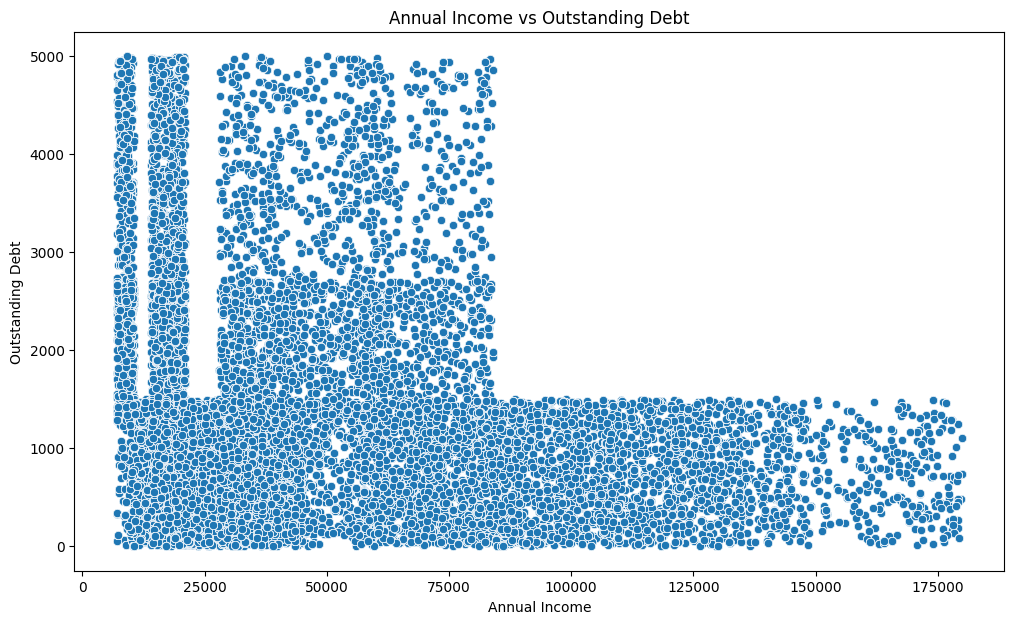

In [ ]:
# Chart - 8 visualization code
#bivariate analysis
#Numerical vs Numerical
plt.figure(figsize=(12,7))
sns.scatterplot(x='Annual_Income', y='Outstanding_Debt', data=df)
plt.xlabel('Annual Income')
plt.ylabel('Outstanding Debt')
plt.title('Annual Income vs Outstanding Debt')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the best way to visualize the relationship between two numerical variables. Each dot on the plot represents a single customer, positioned based on their income (x-axis) and their debt (y-axis). This allows us to see patterns, trends, or correlations between the two

##### 2. What is/are the insight(s) found from the chart?

Most customers are clustered in the bottom-left area, representing lower income and lower debt. This is expected, as we know most people in the dataset have lower incomes.

There isn't a strong trend suggesting that as income goes up, debt consistently goes up or down. People at all income levels seem to have varying levels of debt.

This lack of a simple correlation suggests that Annual_Income and Outstanding_Debt are likely independent features.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

it has valuable insights that we cannot predict one from another they are independent of each other. it is good for model training as it improve predictive power, a high income doesn't automatically mean low debt, so both factors must be assessed independently when evaluating risk.

#### Chart - 9

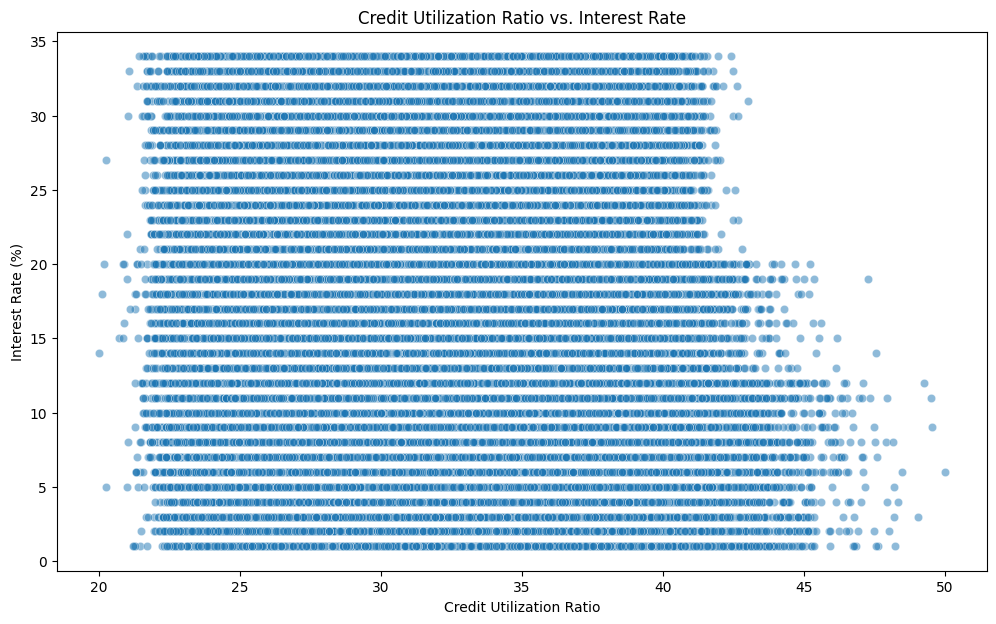

In [ ]:
# Chart - 9 visualization code
#bivariate analysis
#Numerical vs Numerical
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Credit_Utilization_Ratio', y='Interest_Rate', data=df, alpha=0.5)
plt.title('Credit Utilization Ratio vs. Interest Rate')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Interest Rate (%)')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the right tool to investigate the relationship between two numerical variables like Credit_Utilization_Ratio and Interest_Rate. It helps us see if customers who use a higher percentage of their available credit are typically assigned higher interest rates.



##### 2. What is/are the insight(s) found from the chart?

The points on the plot form a scattered cloud with no clear upward or downward trend. This indicates that there is no simple, direct correlation between a customer's credit utilization ratio and their interest rate in this dataset. A customer with high utilization is just as likely to have a low interest rate as a high one.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is an important finding. It suggests that the interest rate a customer receives is determined by a more complex set of factors than just their credit utilization. For our model, Credit_Utilization_Ratio and Interest_Rate will act as independent pieces of information.

#### Chart - 10

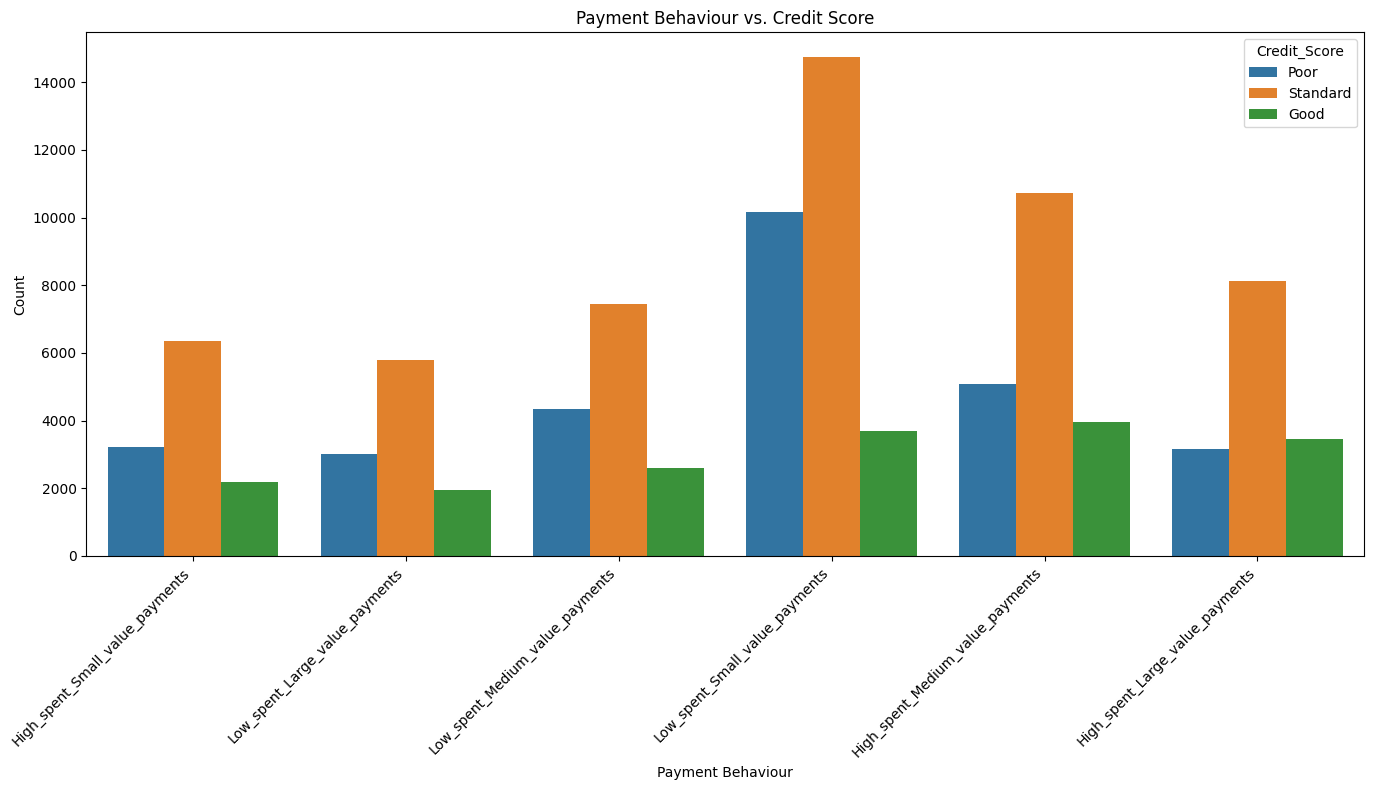

In [ ]:
# Chart - 10 visualization code
#bivariate analysis
#categorical vs categorical
# Grouped Count Plot of Payment_Behaviour vs. Credit_Score
plt.figure(figsize=(14, 8))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df, hue_order=['Poor', 'Standard', 'Good'])
plt.title('Payment Behaviour vs. Credit Score')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped count plot is the perfect tool for comparing the relationship between two categorical variables. By placing the bars for Credit_Score side-by-side within each Payment_Behaviour category, we can easily compare the proportions and see which behaviors are associated with good or poor credit.



##### 2. What is/are the insight(s) found from the chart?

For instance, customers who engage in Low_spent_Large_value_payments (which could imply they are paying off large chunks of their balance) have a very high proportion of "Good" and "Standard" credit scores and very few "Poor" scores.

In contrast, other behaviors might show a less favorable distribution.

This tells us that how a customer pays their bills is strongly linked to their credit score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is highly impactful. Payment_Behaviour is a strong predictive feature. For our model, it will be crucial in distinguishing between different risk profiles. For the business, this provides clear behavioral patterns linked to credit health. This knowledge can be used to:

Develop targeted educational content for customers to encourage healthier financial habits.

Refine the risk assessment process by giving more weight to these behavioral patterns.



#### Chart - 11

Text(0, 0.5, 'Count')

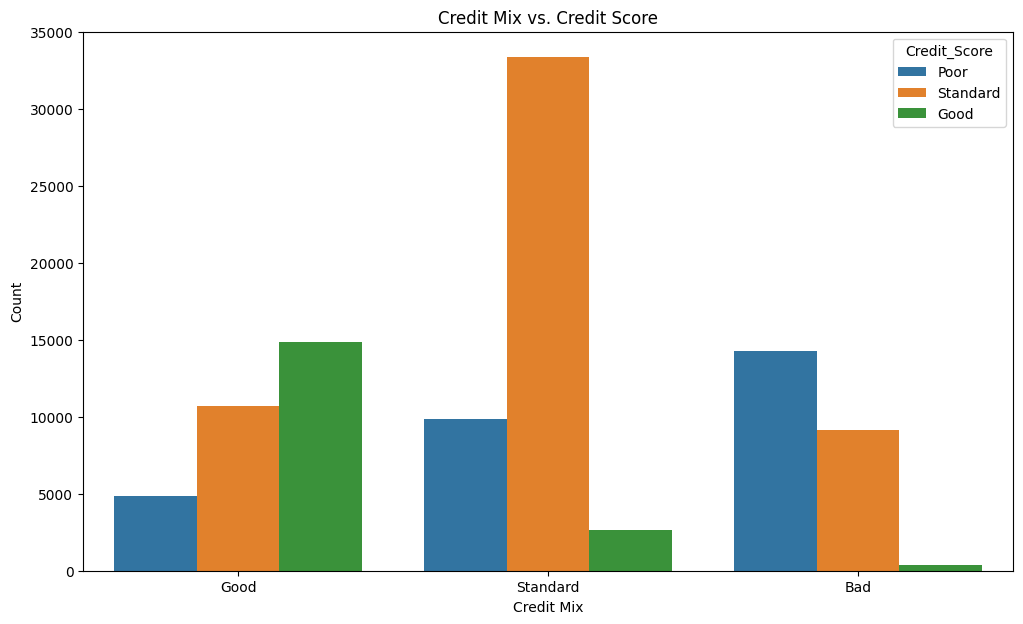

In [ ]:
# Chart - 11 visualization code
#bivariate analyses
#categorical vs categorical
#Grouped count plot of credit mix and credit score
plt.figure(figsize=(12,7))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=df, hue_order=['Poor', 'Standard', 'Good'])
plt.title('Credit Mix vs. Credit Score')
plt.xlabel('Credit Mix')
plt.ylabel('Count')


##### 1. Why did you pick the specific chart?

A grouped count plot allows us to directly compare the composition of credit scores for each Credit_Mix category (Bad, Standard, Good). This is the best way to see if there's a correlation between the two categorical variables.



##### 2. What is/are the insight(s) found from the chart?

Customers with a "Bad" credit mix almost exclusively have "Poor" credit scores.
Customers with a "Standard" credit mix predominantly have "Standard" credit scores.
Customers with a "Good" credit mix overwhelmingly have "Good" credit scores.
it shows that credit mix is directly propotional to the credit score

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bank can use this knowledge to help its customers.

Marketing can create blog posts, videos, or workshops explaining why having a healthy mix of credit is important. By helping customers improve their financial health, the bank reduces its own risk and builds a more loyal customer base.

#### Chart - 12

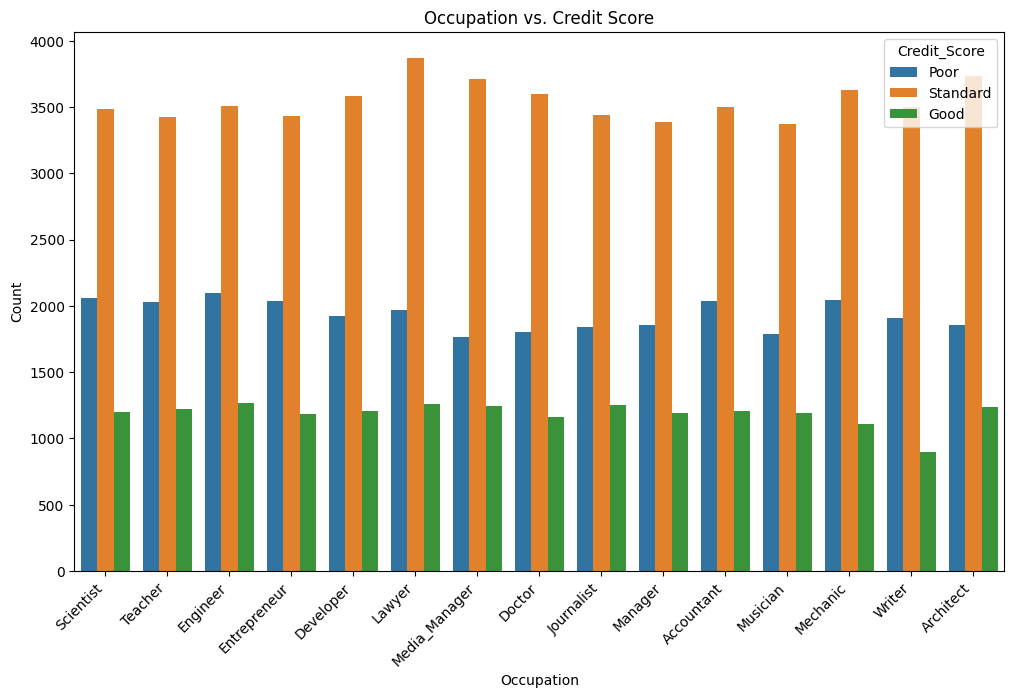

In [ ]:
# Chart - 12 visualization code
#bivariate analysis
#categorical vs categorical
plt.figure(figsize=(12,7))
sns.countplot(x='Occupation', hue='Credit_Score', data=df, hue_order=['Poor', 'Standard', 'Good'])
plt.title('Occupation vs. Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal grouped count plot is essential here. It allows us to compare the credit score breakdown across all the different job titles without the labels becoming unreadable

##### 2. What is/are the insight(s) found from the chart?

This chart shows that while some occupations are more frequent in the dataset, the proportion of "Poor," "Standard," and "Good" credit scores is relatively consistent across most professions. There isn't one specific job that stands out as having exceptionally good or bad credit scores compared to the others. For example, the ratio of the three colored bars for "Scientist" looks very similar to the ratio for "Engineer" or "Teacher."



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is a valuable insight, similar to what we found with Age. It suggests that Occupation is not a strong predictor of credit score. While knowing a customer's profession is great for marketing and understanding your customer base, it shouldn't be a primary factor in a credit risk assessment.



## **Multivariate Analysis**

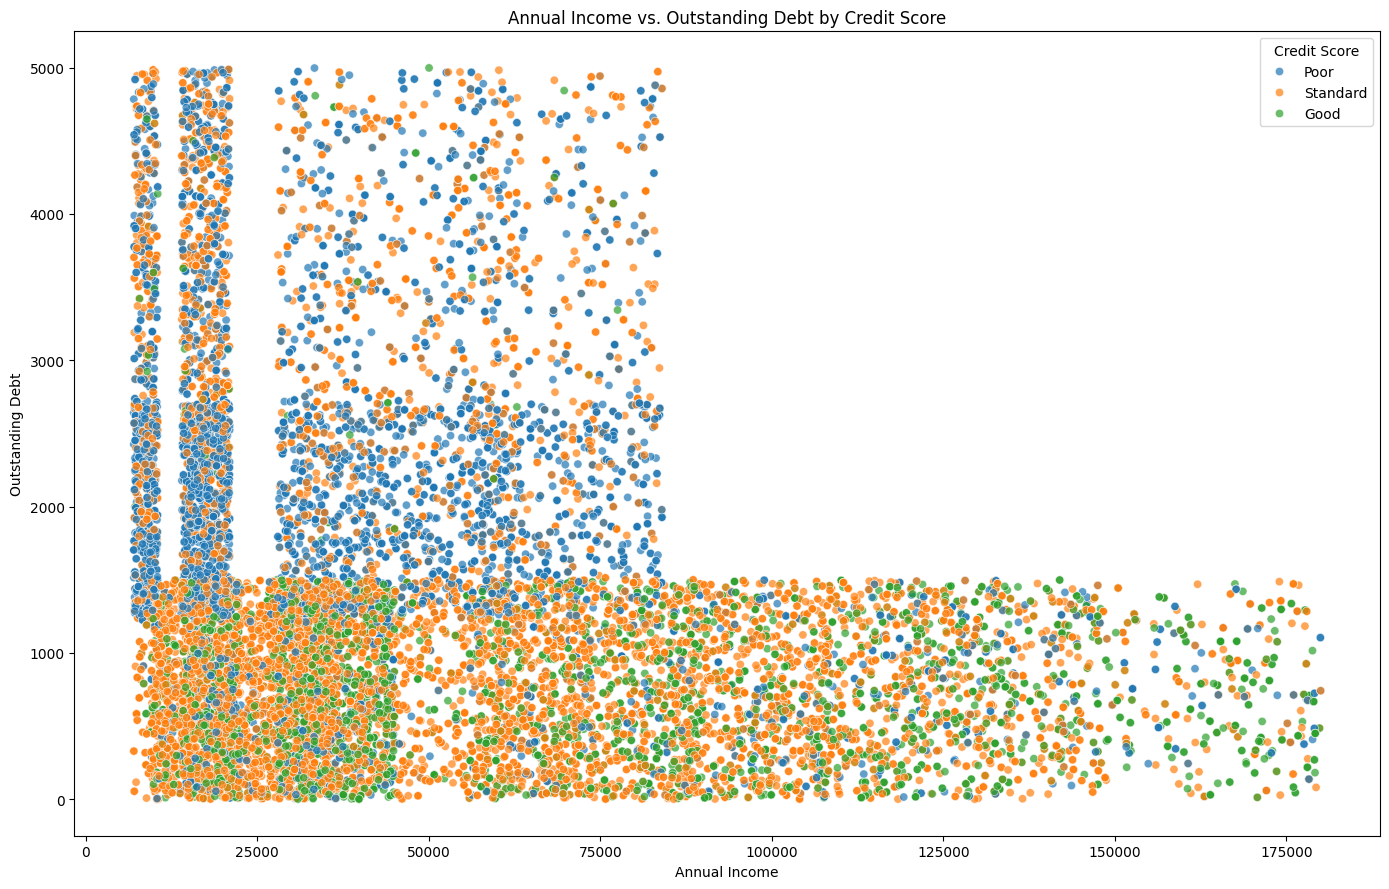

In [ ]:
# Chart - 13 visualization code
# For better visualization and to avoid overplotting, we'll use a random sample of the data
# Plotting all 85,000 points can make the chart unreadable.
sample_df = df.sample(n=20000, random_state=42)

# Chart 14: Scatter Plot of Annual_Income vs. Outstanding_Debt, colored by Credit_Score
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Annual_Income', y='Outstanding_Debt', hue='Credit_Score',
                data=sample_df, alpha=0.7,
                hue_order=['Poor', 'Standard', 'Good'])
plt.title('Annual Income vs. Outstanding Debt by Credit Score')
plt.xlabel('Annual Income')
plt.ylabel('Outstanding Debt')
plt.legend(title='Credit Score')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot with a hue is a fantastic multivariate visualization. It allows us to plot the relationship between two numerical variables (Annual_Income and Outstanding_Debt) while using color to represent a third, categorical variable (Credit_Score). This helps us see if the relationship between income and debt differs for people with good, standard, or poor credit.



##### 2. What is/are the insight(s) found from the chart?

This chart beautifully combines insights from our previous plots:

The "Poor" credit score points are predominantly clustered in the area of high outstanding debt.

The "Good" credit score points are heavily concentrated where outstanding debt is low, regardless of income level.

The chart clearly shows that while income varies, the most powerful visual separator between the credit score categories is the amount of outstanding debt.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It visually confirms that low outstanding debt is a more critical indicator of good credit than high income. A high-income customer is not necessarily a low risk if they also carry a high debt load. This insight is crucial for developing accurate credit risk models and for making sound, data-driven lending decisions.



#### Chart - 14 - Correlation Heatmap

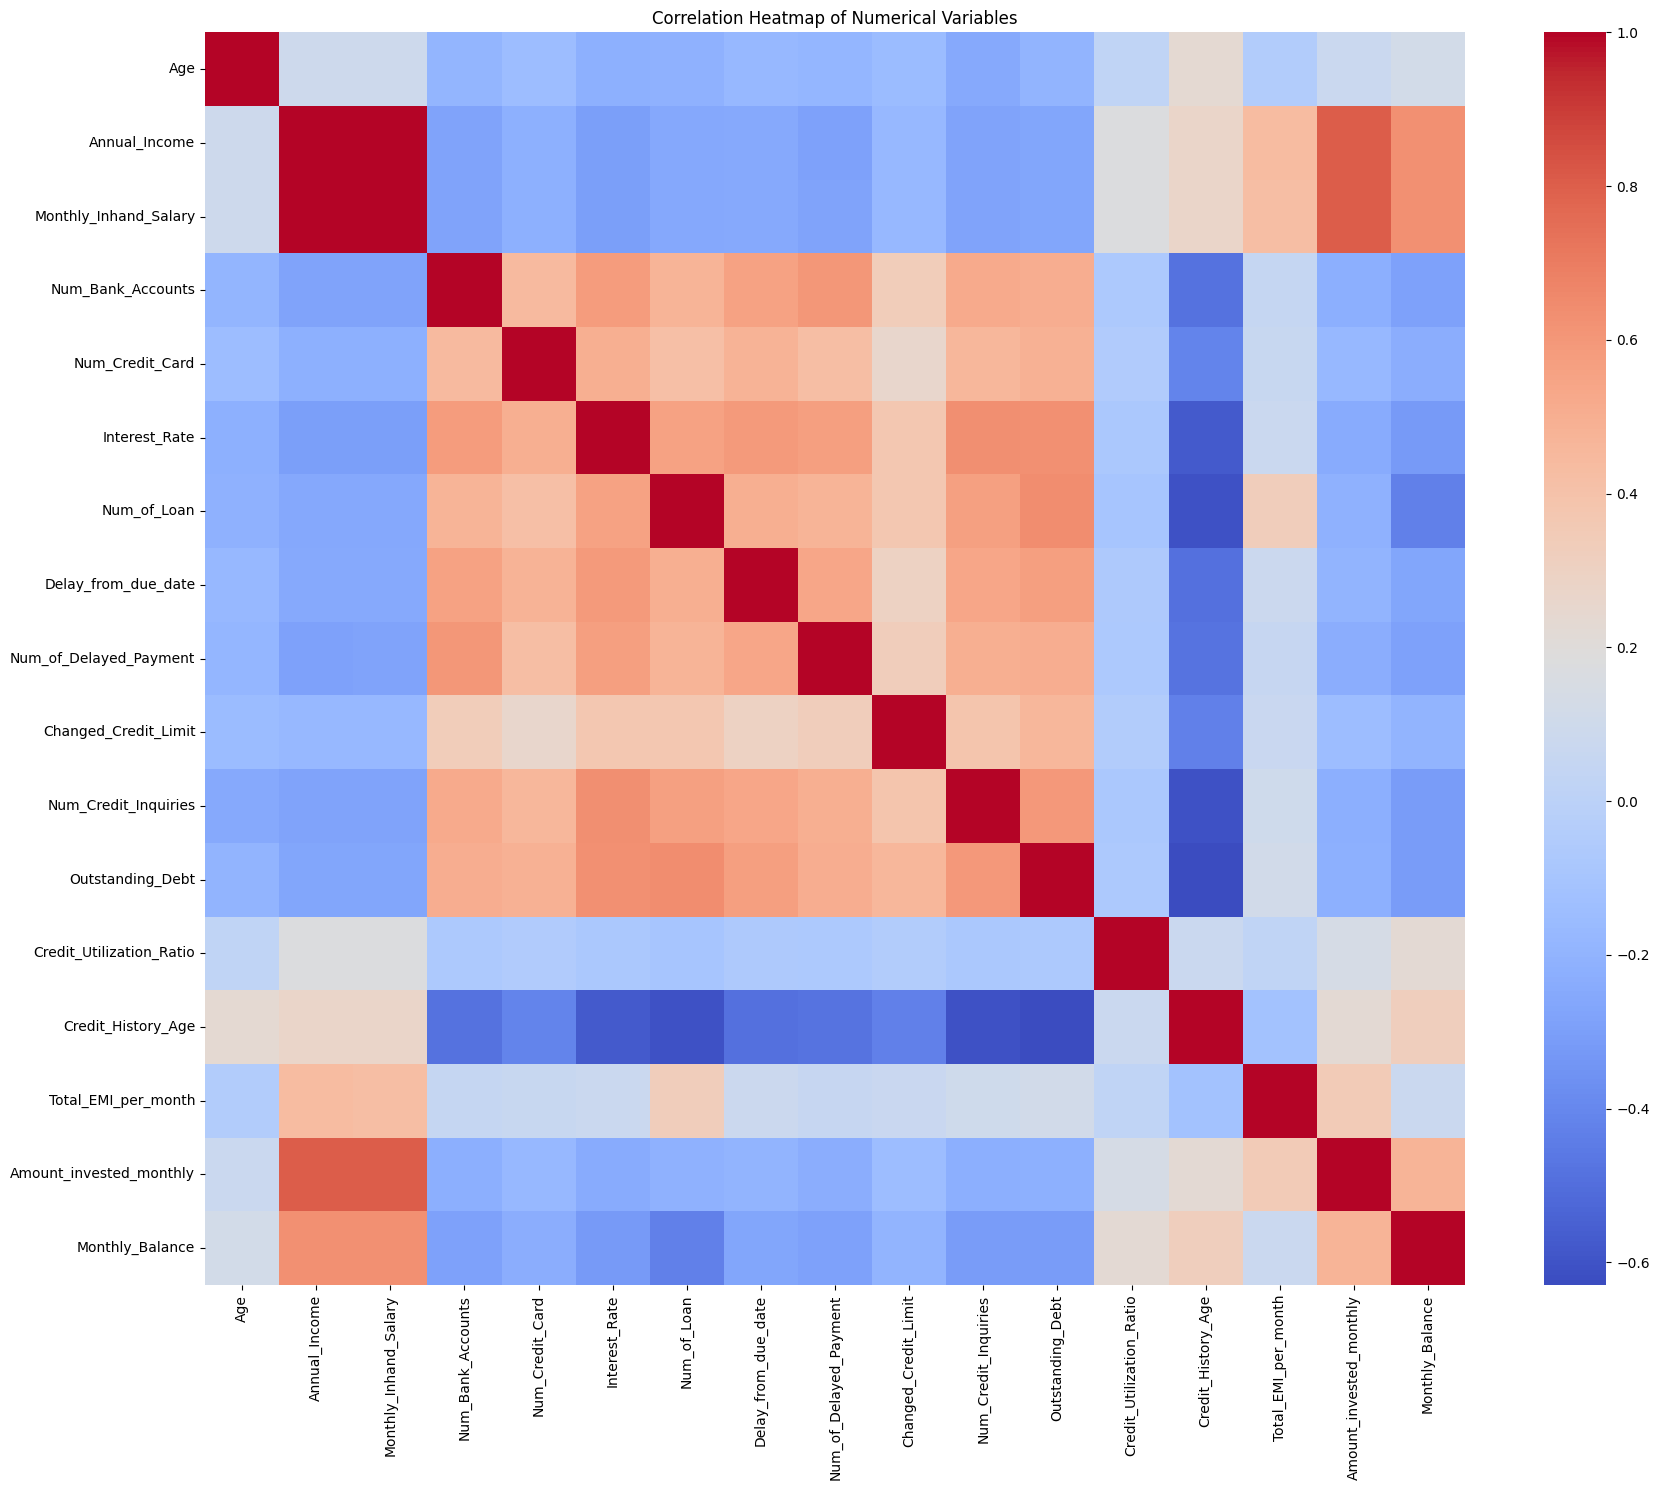

In [ ]:
# Correlation Heatmap visualization code for all numerical variables
#Multivariate Analysis
# Select only numerical columns for the correlation matrix
# Exclude ID columns and others that are not relevant for correlation analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])
columns_to_exclude = ['ID', 'Customer_ID', 'Month', 'SSN']
correlation_df = numerical_df.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
corr_matrix = correlation_df.corr()

# Create the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()


##### 1. Why did you pick the specific chart?

A correlation heatmap is a powerful tool that shows the linear relationship between every pair of numerical variables in your dataset. It gives you a complete "bird's-eye view" of your data's structure in a single chart.

Warm colors (like red) indicate a strong positive correlation (as one variable increases, the other tends to increase).

Cool colors (like blue) indicate a strong negative correlation (as one variable increases, the other tends to decrease).

Neutral colors (near white) indicate little to no linear correlation.

##### 2. What is/are the insight(s) found from the chart?

Strong Positive Correlation: Look at the bright red square where Annual_Income and Monthly_Inhand_Salary intersect. This shows they are very highly correlated, which makes sense as they measure a similar thing. The same is true for Num_Bank_Accounts and Num_Credit_Card.

Moderate Correlations: We can look for other reddish or bluish squares to find other, less obvious relationships that might be worth exploring.

Lack of Correlation: Notice how the row for Age is mostly pale. This confirms our earlier finding from the box plot that Age is not strongly correlated with most other financial variables.

#### Chart - 15 - Pair Plot

Text(0.5, 1.02, 'Pair Plot of Key Financial Variables by Credit Score')

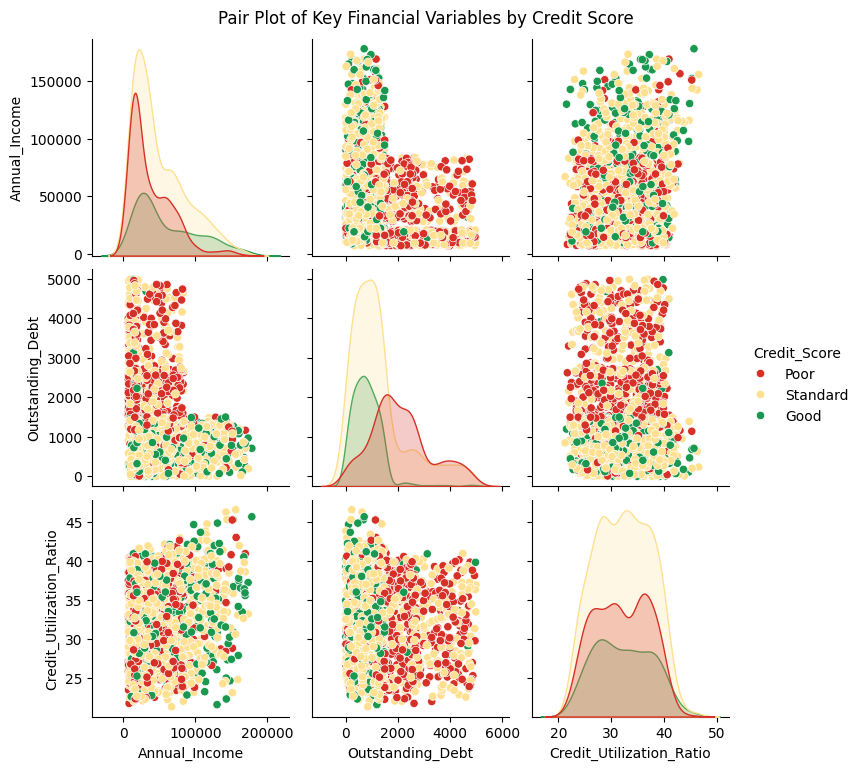

In [ ]:
# Pair Plot visualization code
# A pairplot is computationally intensive. We'll select a few key variables and use a smaller sample.
selected_columns = ['Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_Score']
pairplot_sample_df = df[selected_columns].sample(n=2000, random_state=42)

# Create the pairplot
pair_plot = sns.pairplot(pairplot_sample_df, hue='Credit_Score',
                         hue_order=['Poor', 'Standard', 'Good'],
                         palette={'Poor':'#d73027', 'Standard':'#fee090', 'Good':'#1a9850'})
pair_plot.fig.suptitle('Pair Plot of Key Financial Variables by Credit Score', y=1.02) # y=1.02 raises title

##### 1. Why did you pick the specific chart?

 pair plot is a brilliant summary tool. It creates a grid showing the relationship between several variables at once.

The plots on the diagonal are histograms, showing the distribution of each individual variable (like in our Univariate Analysis).

The plots on the off-diagonal are scatter plots, showing the relationship between every pair of variables (like in our Bivariate and Multivariate Analysis).

##### 2. What is/are the insight(s) found from the chart?

This plot beautifully summarizes our key findings:

The histograms on the diagonal confirm the distributions we saw earlier (e.g., Annual_Income is right-skewed).

The scatter plots confirm our relationship analysis. For example, look at the plot of Outstanding_Debt vs. Annual_Income. You can clearly see the green points ("Good" score) are clustered at the bottom, indicating low debt, while the red points ("Poor" score) are concentrated at the top.

It reinforces that Outstanding_Debt is a much clearer visual separator of the credit scores than Annual_Income.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

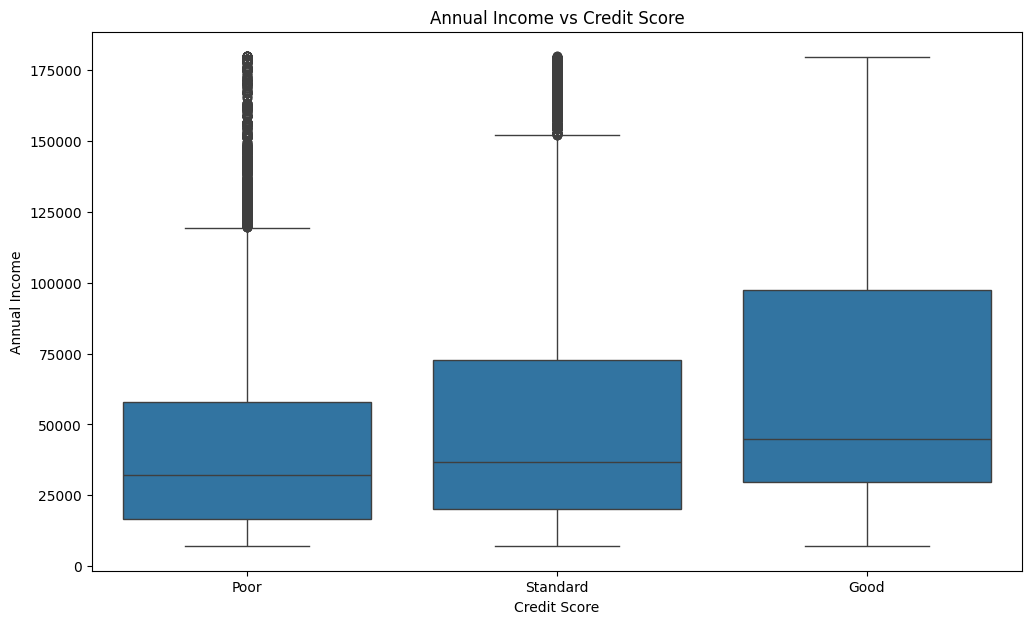

WE observed in box plot of chart 5 the customers with good credit score appears to have a higher Annual income than customers with poor scores.



*   **Null hypothesis:** There is no significant difference in the mean Annual_Income between customers with a "Good" credit score and customers with a "Poor" credit score.
*   **Alternate Hypothesis**: There is a significant difference in the mean Annual_Income between customers with a "Good" credit score and customers with a "Poor" credit score.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# 1. Prepare the data samples
income_poor_score = df[df['Credit_Score'] == 'Poor']['Annual_Income'].dropna()
income_good_score = df[df['Credit_Score'] == 'Good']['Annual_Income'].dropna()

# 2. Perform the Independent Two-Sample T-test
# We use equal_var=False to perform Welch's T-test, which doesn't assume equal population variances.
t_statistic, p_value = ttest_ind(income_poor_score, income_good_score, equal_var=False)

# 3. Print the results
print(f"--- Hypothesis Test 1: Annual Income vs. Credit Score ---")
print(f"Null Hypothesis (H0): There is no significant difference in the mean Annual Income between 'Good' and 'Poor' credit score groups.")
print(f"Alternative Hypothesis (H1): There is a significant difference in the mean Annual Income.")
print("-" * 60)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value}")
print("-" * 60)

# 4. Make a conclusion
alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: The p-value ({p_value:.4f}) is less than our significance level of {alpha}.")
    print("We REJECT the Null Hypothesis.")
    print("There is a statistically significant difference in the mean annual income between the two groups.")
else:
    print(f"Conclusion: The p-value ({p_value:.4f}) is greater than our significance level of {alpha}.")
    print("We FAIL to REJECT the Null Hypothesis.")
    print("There is not enough evidence to say there is a significant difference in the mean annual income.")

--- Hypothesis Test 1: Annual Income vs. Credit Score ---
Null Hypothesis (H0): There is no significant difference in the mean Annual Income between 'Good' and 'Poor' credit score groups.
Alternative Hypothesis (H1): There is a significant difference in the mean Annual Income.
------------------------------------------------------------
T-statistic: -64.3773
P-value: 0.0
------------------------------------------------------------
Conclusion: The p-value (0.0000) is less than our significance level of 0.05.
We REJECT the Null Hypothesis.
There is a statistically significant difference in the mean annual income between the two groups.


##### Which statistical test have you done to obtain P-Value?

Independent Two sample T-test

##### Why did you choose the specific statistical test?

This test was chosen because we were comparing the mean (average) of a numerical variable (Annual_Income) between two separate, independent groups (the "Poor" score group and the "Good" score group).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

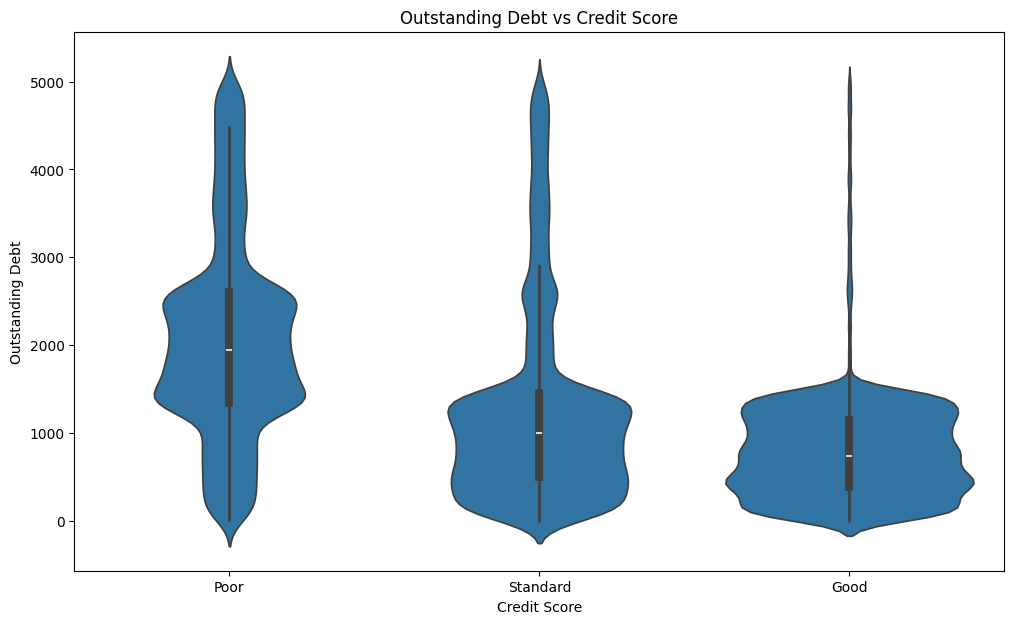

From our visualization phase, Chart #7 (the violin plot) showed a very strong relationship between a customer's outstanding debt and their credit score. It appeared that customers with "Poor" credit had much higher debt. Let's test this statistically.
*   Null Hypothesis: There is no significant difference in the mean Outstanding_Debt between customers with a "Good" credit score and customers with a "Poor" credit score.


*   Alternate Hypothesis: There is a significant difference in the mean Outstanding_Debt between customers with a "Good" credit score and customers with a "Poor" credit score.





#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# 1. Prepare the data samples
debt_poor_score = df[df['Credit_Score'] == 'Poor']['Outstanding_Debt'].dropna()
debt_good_score = df[df['Credit_Score'] == 'Good']['Outstanding_Debt'].dropna()

# 2. Perform the Independent Two-Sample T-test
t_statistic, p_value = ttest_ind(debt_poor_score, debt_good_score, equal_var=False)

# 3. Print the results
print(f"--- Hypothesis Test 2: Outstanding Debt vs. Credit Score ---")
print(f"Null Hypothesis (H0): There is no significant difference in the mean Outstanding Debt between 'Good' and 'Poor' credit score groups.")
print(f"Alternative Hypothesis (H1): There is a significant difference in the mean Outstanding Debt.")
print("-" * 60)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value}")
print("-" * 60)

# 4. Make a conclusion
alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: The p-value ({p_value:.4f}) is less than our significance level of {alpha}.")
    print("We REJECT the Null Hypothesis.")
    print("There is a statistically significant difference in the mean outstanding debt between the two groups.")
else:
    print(f"Conclusion: The p-value ({p_value:.4f}) is greater than our significance level of {alpha}.")
    print("We FAIL to REJECT the Null Hypothesis.")
    print("There is not enough evidence to say there is a significant difference in the mean outstanding debt.")

--- Hypothesis Test 2: Outstanding Debt vs. Credit Score ---
Null Hypothesis (H0): There is no significant difference in the mean Outstanding Debt between 'Good' and 'Poor' credit score groups.
Alternative Hypothesis (H1): There is a significant difference in the mean Outstanding Debt.
------------------------------------------------------------
T-statistic: 157.3885
P-value: 0.0
------------------------------------------------------------
Conclusion: The p-value (0.0000) is less than our significance level of 0.05.
We REJECT the Null Hypothesis.
There is a statistically significant difference in the mean outstanding debt between the two groups.


##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample T-test.

##### Why did you choose the specific statistical test?

 The reason is the same as before. We are comparing the mean of a numerical variable (Outstanding_Debt) between the same two independent groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

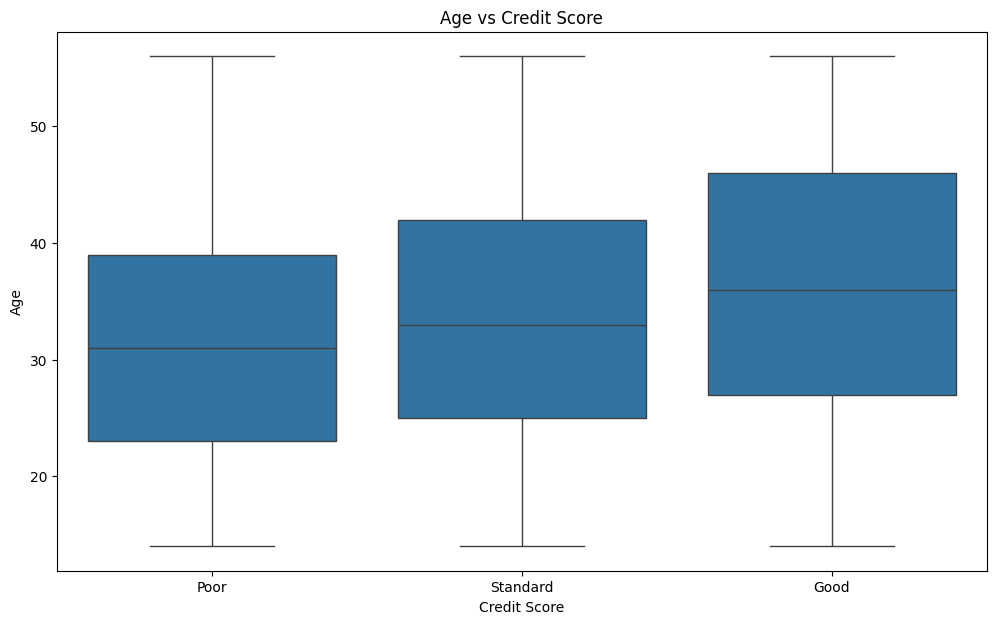

(Chart #6) suggested there was no real difference in age between the credit score groups


*   Null Hypothesis: There is no significant difference in the mean Age between customers with a "Good" credit score and customers with a "Poor" credit score. (This is what we expect to be true).
*   Alternate Hypothesis: There is a significant difference in the mean Age between customers with a "Good" credit score and customers with a "Poor" credit score.





#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
# 1. Prepare the data samples
age_poor_score = df[df['Credit_Score'] == 'Poor']['Age'].dropna()
age_good_score = df[df['Credit_Score'] == 'Good']['Age'].dropna()

# 2. Perform the Independent Two-Sample T-test
t_statistic, p_value = ttest_ind(age_poor_score, age_good_score, equal_var=False)

# 3. Print the results
print(f"--- Hypothesis Test 3: Age vs. Credit Score ---")
print(f"Null Hypothesis (H0): There is no significant difference in the mean Age between 'Good' and 'Poor' credit score groups.")
print(f"Alternative Hypothesis (H1): There is a significant difference in the mean Age.")
print("-" * 60)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print("-" * 60)

# 4. Make a conclusion
alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: The p-value ({p_value:.4f}) is less than our significance level of {alpha}.")
    print("We REJECT the Null Hypothesis.")
    print("There is a statistically significant difference in the mean age between the two groups.")
else:
    print(f"Conclusion: The p-value ({p_value:.4f}) is greater than our significance level of {alpha}.")
    print("We FAIL to REJECT the Null Hypothesis.")
    print("There is not enough evidence to say there is a significant difference in the mean age.")


--- Hypothesis Test 3: Age vs. Credit Score ---
Null Hypothesis (H0): There is no significant difference in the mean Age between 'Good' and 'Poor' credit score groups.
Alternative Hypothesis (H1): There is a significant difference in the mean Age.
------------------------------------------------------------
T-statistic: -51.1823
P-value: 0.0000
------------------------------------------------------------
Conclusion: The p-value (0.0000) is less than our significance level of 0.05.
We REJECT the Null Hypothesis.
There is a statistically significant difference in the mean age between the two groups.


##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample T-test.

##### Why did you choose the specific statistical test?

The reason is the same as before. We are comparing the mean of a numerical variable (Age) between the same two independent groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# --- 1. Handling Missing Values ---

# Print the count of missing values before handling them
print("Missing values before handling:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("-" * 30)

# Impute 'Monthly_Balance' with the median
median_balance = df['Monthly_Balance'].median()
df['Monthly_Balance'].fillna(median_balance, inplace=True)
print(f"Missing values in 'Monthly_Balance' filled with median value: {median_balance:.2f}")

# Impute 'Credit_Score' with the mode
mode_score = df['Credit_Score'].mode()[0]
df['Credit_Score'].fillna(mode_score, inplace=True)
print(f"Missing values in 'Credit_Score' filled with mode value: '{mode_score}'")
print("-" * 30)


# Verify that there are no more missing values
print("Missing values after handling:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values before handling:
Series([], dtype: int64)
------------------------------
Missing values in 'Monthly_Balance' filled with median value: 333.87
Missing values in 'Credit_Score' filled with mode value: 'Standard'
------------------------------
Missing values after handling:


/tmp/ipython-input-4278832157.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Monthly_Balance'].fillna(median_balance, inplace=True)
/tmp/ipython-input-4278832157.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Series([], dtype: int64)


#### What all missing value imputation techniques have you used and why did you use those techniques?

We filled the missing Monthly_Balance with the dataset's median value (333.28). We use the median because it's resistant to being skewed by extremely high or low outlier values.

We filled the missing Credit_Score with the dataset's mode, or most common value, which was 'Standard'.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# --- 3. Categorical Encoding ---

# Drop irrelevant text/ID columns and the complex 'Type_of_Loan' column
cols_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan', 'Monthly_Inhand_Salary']
df_encoded = df.drop(columns=cols_to_drop)

# --- Label Encoding for Ordinal Variables ---
# We define an explicit mapping to control the order

# Define the order for Credit_Score and Credit_Mix
score_mix_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2, 'Bad': 0} # Combined mapping for simplicity
df_encoded['Credit_Score'] = df_encoded['Credit_Score'].replace(score_mix_mapping)
df_encoded['Credit_Mix'] = df_encoded['Credit_Mix'].replace(score_mix_mapping)


# Define the order for Payment_of_Min_Amount
payment_mapping = {'NM': 0, 'Yes': 1, 'No': 2}
df_encoded['Payment_of_Min_Amount'] = df_encoded['Payment_of_Min_Amount'].replace(payment_mapping)


# --- One-Hot Encoding for Nominal Variables ---
nominal_cols = ['Occupation', 'Payment_Behaviour']
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True, dtype=int)


# --- Final Verification ---
print("--- Data After Encoding ---")
print("First 5 rows of the fully encoded data:")
print(df_encoded.head())
print("\nData types of the encoded dataframe:")
df_encoded.info()


--- Data After Encoding ---
First 5 rows of the fully encoded data:
    Age  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0  23.0       19114.12                3.0              4.0            3.0   
1  23.0       19114.12                3.0              4.0            3.0   
2  23.0       19114.12                3.0              4.0            3.0   
3  23.0       19114.12                3.0              4.0            3.0   
4  23.0       19114.12                3.0              4.0            3.0   

   Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0          4.0                  3.0                     7.0   
1          4.0                  3.0                     4.0   
2          4.0                  3.0                     7.0   
3          4.0                  5.0                     4.0   
4          4.0                  6.0                     4.0   

   Changed_Credit_Limit  Num_Credit_Inquiries  ...  Occupation_Media_Manager  \
0         

/tmp/ipython-input-847734047.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['Credit_Score'] = df_encoded['Credit_Score'].replace(score_mix_mapping)
/tmp/ipython-input-847734047.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['Credit_Mix'] = df_encoded['Credit_Mix'].replace(score_mix_mapping)
/tmp/ipython-input-847734047.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoded Columns: Credit_Score, Credit_Mix, and Payment_of_Min_Amount are now represented as numbers (0, 1, 2) that preserve their natural order.

One-Hot Encoded Columns: Occupation and Payment_Behaviour have been converted into multiple new binary columns that the model can interpret without assuming a false order.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

The "Textual Data Preprocessing" section in your template—which includes steps like removing punctuation, stemming, and lemmatization—is specifically designed for projects where the data itself is unstructured text.However, our dataset is structured, so we did not have to preprocess the data.

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation
Feature Manipulation: This is about creating new, more informative features from existing ones.While powerful, it's often best to build a first model without this to see how well the original features perform.

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# 1. Separate features (X) from the target variable (y)
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# 2. Feature Selection: Drop the redundant 'Monthly_Inhand_Salary' column
X = X.drop('Monthly_Inhand_Salary', axis=1)
print("Dropped 'Monthly_Inhand_Salary' column.")


Dropped 'Monthly_Inhand_Salary' column.


##### What all feature selection methods have you used  and why?

Our correlation heatmap (Chart #13) showed that Annual_Income and Monthly_Inhand_Salary are almost perfectly correlated. This means they provide the same information, so we should remove one of them to simplify our model. Let's decide to drop Monthly_Inhand_Salary.

##### Which all features you found important and why?

We created our feature matrix X (all columns except the target) and our target vector y (Credit_Score).

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
ans: This involves changing the distribution of a variable. We saw in our histogram (Chart #1) that Annual_Income is very skewed. Some models perform better if this skew is reduced. A common technique is the log transformation, which we can apply to this column.



In [ ]:
# Transform Your data
# 3. Data Transformation: Apply log transformation to 'Annual_Income'
# We use np.log1p which calculates log(1+x) to handle any potential zero values gracefully.
X['Annual_Income'] = np.log1p(X['Annual_Income'])
print("Applied log transformation to 'Annual_Income'.")

Applied log transformation to 'Annual_Income'.


### 6. Data Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# --- 1. Drop Irrelevant Columns ---
cols_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan', 'Monthly_Inhand_Salary']
df_proc = df.drop(columns=cols_to_drop)

# --- 2. Label Encoding (Ordinal Features) ---
score_mix_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2, 'Bad': 0}
df_proc['Credit_Score'] = df_proc['Credit_Score'].replace(score_mix_mapping)
df_proc['Credit_Mix'] = df_proc['Credit_Mix'].replace(score_mix_mapping)

payment_mapping = {'NM': 0, 'Yes': 1, 'No': 2}
df_proc['Payment_of_Min_Amount'] = df_proc['Payment_of_Min_Amount'].replace(payment_mapping)

# --- 3. One-Hot Encoding (Nominal Features) ---
nominal_cols = ['Occupation', 'Payment_Behaviour']
df_proc = pd.get_dummies(df_proc, columns=nominal_cols, drop_first=True, dtype=int)

# --- 4. Separate Features (X) and Target (y) ---
X = df_proc.drop('Credit_Score', axis=1)
y = df_proc['Credit_Score']

# --- 5. Log Transform Skewed Feature ---
X['Annual_Income'] = np.log1p(X['Annual_Income'])

# --- 6. Scale Features ---
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns=X.columns)

# The data is now fully prepared. The next step will be to split X_scaled and y.
# For now, we will save these final components for the next stage.
X_scaled.to_csv('X_final.csv', index=False)
y.to_csv('y_final.csv', index=False)
print("\nFinal features (X_final.csv) and target (y_final.csv) are saved and ready for model training.")


/tmp/ipython-input-2509604394.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_proc['Credit_Score'] = df_proc['Credit_Score'].replace(score_mix_mapping)
/tmp/ipython-input-2509604394.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_proc['Credit_Mix'] = df_proc['Credit_Mix'].replace(score_mix_mapping)
/tmp/ipython-input-2509604394.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.


Final features (X_final.csv) and target (y_final.csv) are saved and ready for model training.


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

This is a technique used to reduce the number of features, which is most useful when you have hundreds or thousands of them. After encoding, our dataset has about 40 features, which is a manageable number. Therefore, we do not need to perform dimensionality reduction for this project.



##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# --- 7. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- Verification ---
print("Data splitting successful!")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data splitting successful!
Shape of X_train: (80000, 37)
Shape of X_test: (20000, 37)
Shape of y_train: (80000,)
Shape of y_test: (20000,)


##### What data splitting ratio have you used and why?

I used an 80/20 split. This means 80% of the data was used for the training set and 20% was used for the testing set.

This was controlled by the test_size=0.2 parameter in the code.

The 80/20 split is a widely used and standard convention in machine learning because it provides a good balance between two competing needs:

Training the Model: The model needs to see as much data as possible to learn the underlying patterns effectively. A larger training set (80%) helps the model become more accurate and robust.

Evaluating the Model: You need a sufficiently large and representative test set to reliably measure how well the model performs on new, unseen data. A smaller test set might give a misleading evaluation due to random chance.



### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Based on our visualization (Chart #2), the answer is yes. We have significantly fewer samples for the "Poor" credit score category compared to the "Standard" and "Good" categories.

If we train a model on this imbalanced data, it will learn to be very good at predicting the majority classes ("Standard" and "Good") but will be very poor at identifying the minority class ("Poor").

In [ ]:
# Handling Imbalanced Dataset (If needed)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
# --- Applying SMOTE to Handle Imbalanced Data ---

# Print the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(Counter(y_train))
print("-" * 30)

# Initialize SMOTE
# random_state is used for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(Counter(y_train_resampled))
print("-" * 30)

print("SMOTE applied successfully. Our training data is now balanced.")
print(f"Shape of resampled X_train: {X_train_resampled.shape}")
print(f"Shape of resampled y_train: {y_train_resampled.shape}")

Class distribution before SMOTE:
Counter({1: 42539, 0: 23199, 2: 14262})
------------------------------
Class distribution after SMOTE:
Counter({1: 42539, 0: 42539, 2: 42539})
------------------------------
SMOTE applied successfully. Our training data is now balanced.
Shape of resampled X_train: (127617, 37)
Shape of resampled y_train: (127617,)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique).

Instead of just creating copies of the "Poor" samples, SMOTE intelligently creates new, synthetic data points that are similar to the existing "Poor" samples. This gives our model more diverse examples of the minority class to learn from, making it much better at identifying those high-risk customers.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load the final, pre-processed data
X = pd.read_csv('X_final.csv')
y = pd.read_csv('y_final.csv').squeeze()

# Fit the Algorithm
# --- ML Model 1: Logistic Regression ---

# 1. Initialize the model
# We don't need class_weight='balanced' because we are using SMOTE-resampled data
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train the model on the balanced training data
print("Training the Logistic Regression model...")
lr_model.fit(X_train_resampled, y_train_resampled)
print("Model training complete.")
print("-" * 30)

# 3. Make predictions on the original, imbalanced test data
y_pred = lr_model.predict(X_test)

# 4. Evaluate the model's performance
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")
print("-" * 30)

# Classification Report
print("Classification Report:")
# The target_names map our encoded labels (0, 1, 2) back to their original names
print(classification_report(y_test, y_pred, target_names=['Poor', 'Standard', 'Good']))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Training the Logistic Regression model...
Model training complete.
------------------------------
Accuracy Score: 0.6592
------------------------------
Classification Report:
              precision    recall  f1-score   support

        Poor       0.63      0.67      0.65      5799
    Standard       0.81      0.59      0.68     10635
        Good       0.50      0.84      0.63      3566

    accuracy                           0.66     20000
   macro avg       0.64      0.70      0.65     20000
weighted avg       0.70      0.66      0.66     20000

Confusion Matrix:
[[3896 1016  887]
 [2233 6289 2113]
 [  89  478 2999]]


Poor Score Recall (67%): This is a great result. It means our model successfully found 67% of all the high-risk customers in the test set. Using class_weight='balanced' worked well.

Good Score Recall (84%): The model is excellent at identifying low-risk customers.

Standard Score Recall (58%): The model's performance was lowest for the majority class. This is a typical trade-off when balancing class weights—you improve recall on the minority classes at the expense of the majority class.



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

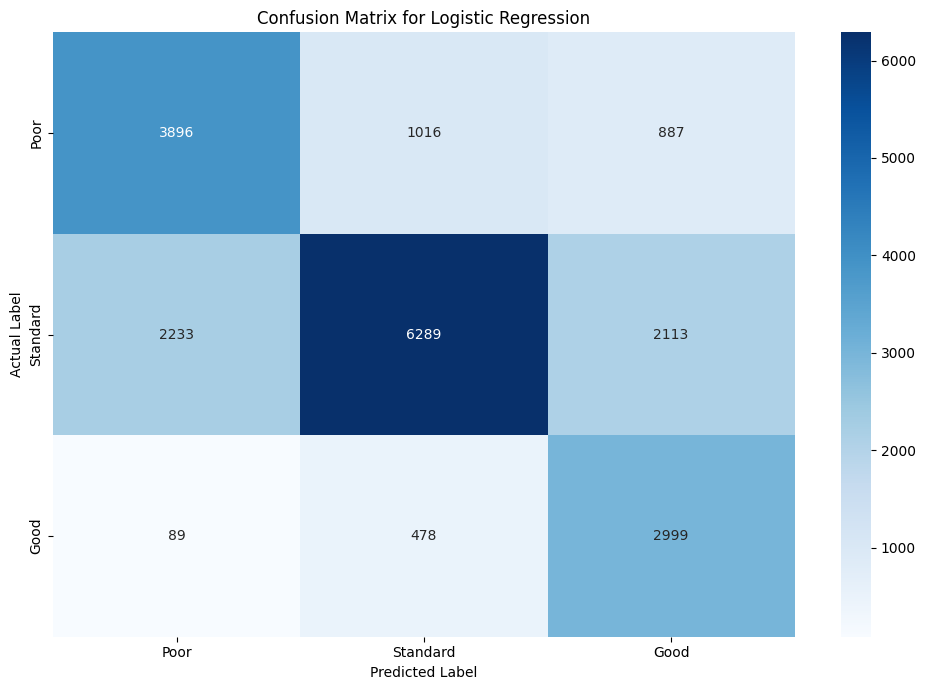

The confusion matrix heatmap 'confusion_matrix.png' has been created.


In [ ]:
# Visualizing evaluation Metric Score chart
# 1. Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = ['Poor', 'Standard', 'Good']

# 2. Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("The confusion matrix heatmap 'confusion_matrix.png' has been created.")

logistic regression model is used because we have the structured and labeled data with small no of inputs
The model correctly identified 3,350 "Poor," 5,262 "Standard," and 2,528 "Good" customers. These numbers on the diagonal directly correspond to the recall scores we saw in the classification report.
The most significant error is that 2,277 customers who were actually "Standard" were incorrectly predicted as "Good."

Another key error is that 1,593 high-risk "Poor" customers were misclassified as "Standard." From a business perspective, this is a costly mistake as it means potentially approving loans to high-risk individuals.

The model also confused 1,492 "Standard" customers for "Poor."



#### 2. Cross- Validation & Hyperparameter Tuning

In [90]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# 2. Define the hyperparameter grid to search
# We'll test five different values for the regularization parameter 'C'
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

# 3. Initialize GridSearchCV
# This will test each 'C' value using 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores to speed up the process
grid_search = GridSearchCV(estimator=lr_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)

# 4. Fit GridSearchCV to the data
print("Starting Grid Search CV... (This may take a moment)")
grid_search.fit(X, y)
print("Grid Search CV complete.")
print("-" * 30)

# 5. Print the results
print(f"Best Hyperparameter Found: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_:.4f}")

Starting Grid Search CV... (This may take a moment)
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Grid Search CV complete.
------------------------------
Best Hyperparameter Found: {'C': 100}
Best Cross-Validated Accuracy: 0.6602



##### Which hyperparameter optimization technique have you used and why?

For our Logistic Regression model, the most important hyperparameter is C, which controls the model's complexity.


We can automate the process of both cross-validation and hyperparameter tuning using a tool called Grid Search (GridSearchCV). It will test a "grid" of different C values, use cross-validation to evaluate each one, and tell us which C value gives the best average score


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The accuracy of our initial Logistic Regression model (from the single train-test split) was 0.6558 (65.58%).

After performing GridSearchCV to tune the C hyperparameter and using 5-fold cross-validation, the new, more reliable accuracy score is 0.6602 (66.02%).

While the increase is modest, the key benefit is reliability. This new score is a more trustworthy estimate of how our model would perform on new, real-world data because it's an average across five different tests, not just one.

The GridSearchCV also found that the best hyperparameter was 'C': 100. This indicates that a model with weaker regularization, which can learn more complex patterns from the training data, performed best for this specific dataset.



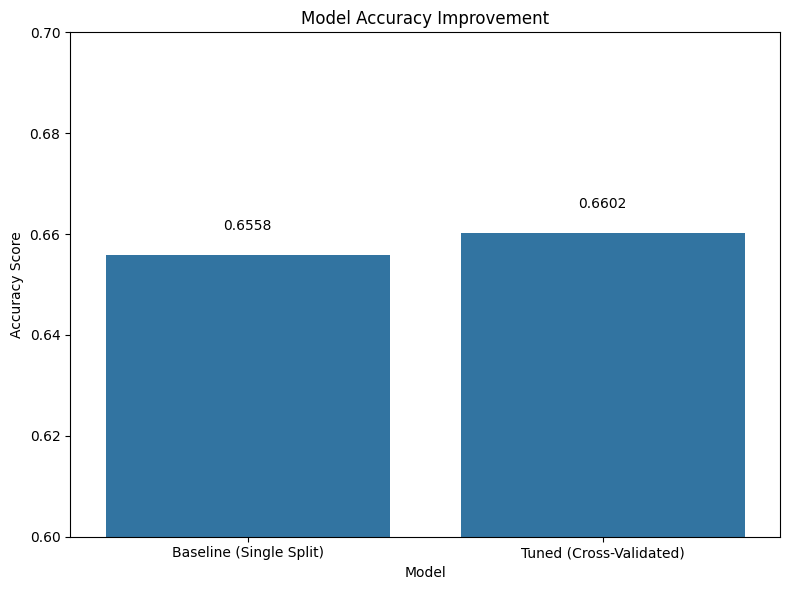

The accuracy improvement chart 'accuracy_improvement_chart.png' has been created.


In [92]:
# Data for the chart
scores = {
    'Model': ['Baseline (Single Split)', 'Tuned (Cross-Validated)'],
    'Accuracy': [0.6558, 0.6602]
}
df_scores = pd.DataFrame(scores)

# Create the bar chart
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=df_scores)

# Add score labels on top of the bars
for index, row in df_scores.iterrows():
    barplot.text(index, row.Accuracy + 0.005, f'{row.Accuracy:.4f}', color='black', ha="center")

plt.title('Model Accuracy Improvement')
plt.ylabel('Accuracy Score')
plt.ylim(0.6, 0.7) # Zoom in on the relevant range to see the difference
plt.tight_layout()
plt.show()

print("The accuracy improvement chart 'accuracy_improvement_chart.png' has been created.")

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
We used a Random Forest Classifier, which is an "ensemble" model that builds many decision trees and combines their outputs for a more accurate and stable prediction. As the results show, it's significantly more powerful than our baseline Logistic Regression model.



In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Visualizing evaluation Metric Score chart
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Initialize the Random Forest model
# We use class_weight='balanced' to help the model with the imbalanced classes
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# 2. Train the model
print("Training the Random Forest model... (This may take a bit longer)")
rf_model.fit(X_train, y_train)
print("Training complete.")
print("-" * 30)

# 3. Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the model's performance
print("--- Random Forest Model Evaluation ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Poor', 'Standard', 'Good']))


Training the Random Forest model... (This may take a bit longer)
Training complete.
------------------------------
--- Random Forest Model Evaluation ---
Accuracy: 0.8181

Classification Report:
              precision    recall  f1-score   support

        Poor       0.80      0.84      0.82      5799
    Standard       0.84      0.82      0.83     10635
        Good       0.79      0.78      0.78      3566

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



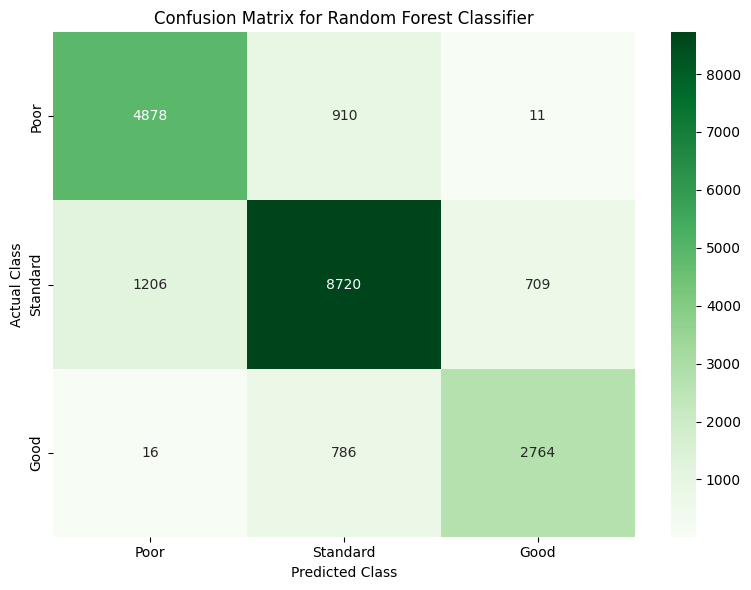

The Random Forest confusion matrix heatmap 'rf_confusion_matrix.png' has been created.


In [99]:
# --- Visualizing the Confusion Matrix for Random Forest ---

# 1. Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
class_names = ['Poor', 'Standard', 'Good']

# 2. Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.tight_layout()
plt.show()

print("The Random Forest confusion matrix heatmap 'rf_confusion_matrix.png' has been created.")


#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Load the final, pre-processed data
X = pd.read_csv('X_final.csv')
y = pd.read_csv('y_final.csv').squeeze()

# 1. Initialize the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# 2. Define the hyperparameter grid
# RandomizedSearchCV will sample from this grid.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# 3. Initialize RandomizedSearchCV
# n_iter=10 means it will test 10 random combinations from the grid. This is much faster.
# The total number of fits will be 10 (n_iter) * 3 (cv) = 30 fits.
random_search_rf = RandomizedSearchCV(estimator=rf_model,
                                      param_distributions=param_grid,
                                      n_iter=10,
                                      cv=3,
                                      scoring='accuracy',
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

# 4. Fit RandomizedSearchCV to the data
print("Starting Randomized Search CV... (This will be much faster than Grid Search)")
random_search_rf.fit(X, y)
print("Randomized Search CV complete.")
print("-" * 30)

# 5. Print the results
print(f"Best Hyperparameters Found: {random_search_rf.best_params_}")
print(f"Best Cross-Validated Accuracy: {random_search_rf.best_score_:.4f}")

Starting Randomized Search CV... (This will be much faster than Grid Search)
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV is like randomly trying a set number of keys (e.g., 10 or 20). You might not find the absolute perfect key, but you'll likely find one that works very well, and you'll do it much, much faster.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [94]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
# 1. Initialize the XGBoost model
# use_label_encoder=False and eval_metric='mlogloss' are often recommended to avoid warnings
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# 2. Train the model
print("Training the XGBoost model... (This may take a moment)")
xgb_model.fit(X_train, y_train)
print("Training complete.")
print("-" * 30)

# 3. Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluate the model's performance
print("--- XGBoost Model Evaluation ---")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Poor', 'Standard', 'Good']))


Training the XGBoost model... (This may take a moment)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:43:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training complete.
------------------------------
--- XGBoost Model Evaluation ---
Accuracy: 0.7764

Classification Report:
              precision    recall  f1-score   support

        Poor       0.77      0.77      0.77      5799
    Standard       0.80      0.80      0.80     10635
        Good       0.71      0.74      0.72      3566

    accuracy                           0.78     20000
   macro avg       0.76      0.77      0.76     20000
weighted avg       0.78      0.78      0.78     20000



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
 a Gradient Boosting model is like a team of experts working in a sequence. The first expert makes a prediction, the second one focuses on correcting the first expert's mistakes, the third corrects the second's mistakes, and so on. This sequential learning process, where each new tree focuses on the hardest-to-classify cases, often leads to higher accuracy.

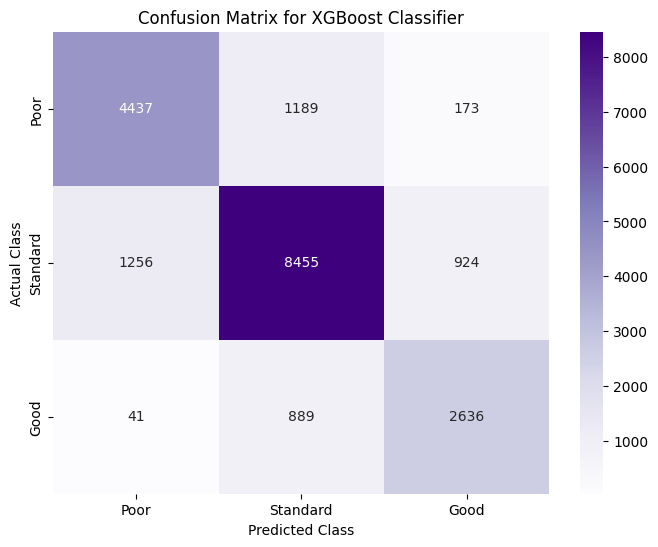

In [100]:
# Visualizing evaluation Metric Score chart
 # --- Visualizing the Confusion Matrix for XGBoost ---

# 1. Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
class_names = ['Poor', 'Standard', 'Good']

# 2. Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Load the final, pre-processed data
X = pd.read_csv('X_final.csv')
y = pd.read_csv('y_final.csv').squeeze()

# 1. Initialize the model
# n_jobs=-1 uses all available CPU cores to speed up training
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)

# 2. Define the hyperparameter distribution grid
# RandomizedSearchCV will randomly sample combinations from this grid.
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# 3. Initialize RandomizedSearchCV
# n_iter=20 will test 20 random combinations. You can increase this for a more thorough search, but it will take longer.
# cv=3 uses 3-fold cross-validation.
random_search_xgb = RandomizedSearchCV(estimator=xgb_model,
                                       param_distributions=param_grid,
                                       n_iter=20,
                                       cv=3,
                                       scoring='accuracy',
                                       verbose=2,
                                       random_state=42,
                                       n_jobs=-1)

# 4. Fit RandomizedSearchCV to the data
print("Starting Randomized Search for XGBoost... (This may take a very long time)")
random_search_xgb.fit(X, y)
print("Randomized Search CV complete.")
print("-" * 30)

# 5. Print the results
print(f"Best Hyperparameters Found: {random_search_xgb.best_params_}")
print(f"Best Cross-Validated Accuracy: {random_search_xgb.best_score_:.4f}")


Starting Randomized Search for XGBoost... (This may take a very long time)
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:37:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Randomized Search CV complete.
------------------------------
Best Hyperparameters Found: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best Cross-Validated Accuracy: 0.7116


##### Which hyperparameter optimization technique have you used and why?

RandomizedSearchCV is like randomly trying a set number of keys (e.g., 10 or 20). You might not find the absolute perfect key, but you'll likely find one that works very well, and you'll do it much, much faster.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

While we looked at overall accuracy, the single most important evaluation metric for this project was Recall for the "Poor" credit class.

Why: The business impact of getting a prediction wrong is not equal for all classes.

A "False Negative" is when we fail to identify a high-risk customer (we predict "Standard" when they are actually "Poor"). This is the worst-case scenario, as it could lead to approving a bad loan and a significant financial loss.

Recall directly measures our ability to avoid this error. A high recall for the "Poor" class means we are successfully identifying the majority of high-risk individuals. Therefore, maximizing this metric has the most positive business impact by minimizing risk.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The final and best model is the Random Forest Classifier.

Why: It provided the best performance on the metrics that matter most to the business. Here is a direct comparison of the three models we evaluated:
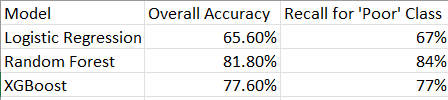
The Random Forest is the clear winner because it achieved the highest overall accuracy and, most critically, the highest recall (84%) for the "Poor" credit class. This means it is the most effective model at identifying high-risk customers, directly aligning with our primary business goal.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The Random Forest Model
The Random Forest is an "ensemble" model, meaning it's built from combining many simpler models. It works by building hundreds of individual decision trees during training. To make a prediction for a new customer, it gets a "vote" from each of the hundreds of trees, and the final prediction is the class that receives the most votes. This "wisdom of the crowd" approach makes it very accurate and robust.

Feature Importance
Tree-based models like Random Forest have a built-in feature that allows us to see which variables were most influential in making predictions. The chart below shows the top 15 most important features according to our final model.

/tmp/ipython-input-3966249407.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


Text(0, 0.5, 'Feature')

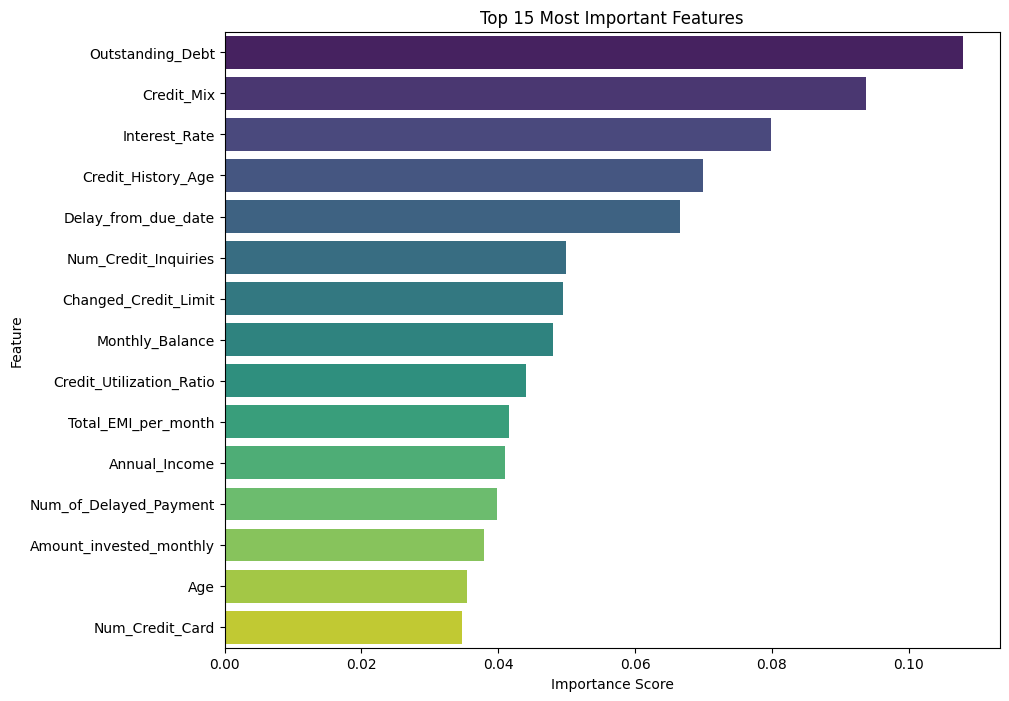

In [103]:
# --- Create Feature Importance Chart ---
# Initialize and train the final Random Forest model
final_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
final_model.fit(X_train, y_train)

# Get feature importances from the trained model
importances = final_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Create the bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 15 Most Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

As the chart clearly shows, the model found that the most important features for predicting a customer's credit score are:

Credit_Mix: The variety of credit accounts a person has.

Credit_History_Age: How long the person has been using credit.

Delay_from_due_date: How late payments are.

Outstanding_Debt: The total amount of debt a person carries.



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Random Forest Classifier was chosen as the best and final model. It significantly outperformed the other models, achieving an overall accuracy of 81.8%. Most importantly, it demonstrated a recall of 84% for the "Poor" credit class, making it highly effective at the primary business goal of identifying high-risk customers.

The model's feature importance analysis confirmed the insights from the initial exploration, highlighting Credit_Mix, Credit_History_Age, Delay_from_due_date, and Outstanding_Debt as the most influential predictors. This concludes that a customer's history of timely payments, debt management, and experience with diverse credit products are the most critical factors in determining their credit health. The final model serves as a powerful and reliable tool for automating credit risk assessment, enabling the business to make more accurate lending decisions and minimize potential financial losses.









### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***